# *Projeto Machine Learning*

 * Grupo 2:
 * Edmagno
 * Leonardo
 * Marcos 
 * Nícolas
 * Vinicius

*O objetivo deste projeto de machine learning é desenvolver um modelo capaz de prever fraudes em transações de cartões de crédito. Para isso, serão utilizados dados históricos de transações de cartões de crédito que incluem informações como data, hora, valor, localização, tipo de transação, informações do portador do cartão, entre outras.*

*Em seguida, será aplicado um algoritmo de classificação, como Random Forest ou KNN, para treinar o modelo com os dados históricos. Durante o treinamento, serão utilizadas técnicas de validação cruzada e ajuste de hiperparâmetros para garantir que o modelo seja robusto e tenha uma boa performance.*

*Por fim, o modelo será avaliado utilizando uma base de dados de transações de cartões de crédito não vistas anteriormente e comparando as previsões do modelo com as transações reais. Serão utilizadas métricas de avaliação, como precisão, recall e F1-score, para avaliar a performance do modelo.*

*O projeto será implementado em Python, utilizando bibliotecas populares de machine learning, como Scikit-learn e Pandas, para facilitar a análise dos dados e a implementação do modelo de machine learning.*


## *Imports*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer, ConfusionMatrixDisplay
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

from collections import Counter

## 1. Carregar os DF's

In [ ]:
fraud_train = pd.read_csv('./fraudTrain.csv')
fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
fraud_test = pd.read_csv('./fraudTest.csv')
fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## 2. Análise inicial

In [ ]:
#Para facilitar as análises os DataFrames de treino e teste foram concatenados em um só
fraud_df = pd.concat([fraud_train, fraud_test], ignore_index= True)

In [ ]:
#Para evitar modificar a base original 
df = fraud_df
df = fraud_df.drop(['Unnamed: 0'],axis =1)
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:
# Adicionando coluna com informação de idade 
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year

In [ ]:
# Adicionando irformações como ano, mês, hora, dia da semana e dia de cada transação
df["year"] = pd.DatetimeIndex(df["trans_date_trans_time"]).year.astype(int)
df["hour"] = pd.DatetimeIndex(df["trans_date_trans_time"]).hour
df["month"] = pd.DatetimeIndex(df["trans_date_trans_time"]).month
df['dayofweek'] = pd.DatetimeIndex(df["trans_date_trans_time"]).dayofweek + 1
df["day"] = pd.DatetimeIndex(df["trans_date_trans_time"]).day
df = df.drop("trans_date_trans_time", axis= 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 27 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    object 
 2   category    object 
 3   amt         float64
 4   first       object 
 5   last        object 
 6   gender      object 
 7   street      object 
 8   city        object 
 9   state       object 
 10  zip         int64  
 11  lat         float64
 12  long        float64
 13  city_pop    int64  
 14  job         object 
 15  dob         object 
 16  trans_num   object 
 17  unix_time   int64  
 18  merch_lat   float64
 19  merch_long  float64
 20  is_fraud    int64  
 21  age         int64  
 22  year        int64  
 23  hour        int64  
 24  month       int64  
 25  dayofweek   int64  
 26  day         int64  
dtypes: float64(5), int64(11), object(11)
memory usage: 381.6+ MB


In [ ]:
#Verificando existência de valores nulos
df.isna().sum()

cc_num        0
merchant      0
category      0
amt           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
age           0
year          0
hour          0
month         0
dayofweek     0
day           0
dtype: int64

### 2.1. Verificando Correlação das Features

In [ ]:
# Correlação Linear
df.corr()

C:\Users\marco\AppData\Local\Temp\ipykernel_8360\2751735930.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,year,hour,month,dayofweek,day
cc_num,1.000000,0.001826,0.041504,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,-0.001125,-0.000143,0.000443,-0.000902,-0.000188,-0.000851,-0.000136
amt,0.001826,1.000000,0.001979,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,0.209308,-0.010662,-0.001266,-0.024891,-0.002593,0.000491,0.000069
zip,0.041504,0.001979,1.000000,-0.114554,-0.909795,0.077601,0.001017,-0.113934,-0.908981,-0.002190,0.010347,0.000522,0.005947,0.001160,-0.001021,-0.000442
lat,-0.058744,-0.000670,-0.114554,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.002904,0.047124,0.001140,-0.011259,-0.000402,0.000637,-0.000767
long,-0.048429,-0.000735,-0.909795,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.001022,-0.029445,0.000012,-0.002082,-0.001184,0.001157,0.000115
city_pop,-0.009118,0.004921,0.077601,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,0.000325,-0.090867,-0.001660,0.019949,-0.000510,0.001180,0.000654
unix_time,0.000284,-0.002411,0.001017,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,-0.013329,-0.004249,0.867243,0.000571,0.496730,-0.072071,0.048073
merch_lat,-0.058415,-0.000613,-0.113934,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.002778,0.046749,0.001108,-0.011119,-0.000429,0.000505,-0.000865
merch_long,-0.048421,-0.000711,-0.908981,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000999,-0.029401,0.000010,-0.002120,-0.001175,0.001122,0.000129
is_fraud,-0.001125,0.209308,-0.002190,0.002904,0.001022,0.000325,-0.013329,0.002778,0.000999,1.000000,0.011103,-0.006022,0.013196,-0.016417,0.004562,-0.000131


In [ ]:
# Correlação Chi2
numeric_columns = df.corr().columns.to_list()
# Colunas retiradas possuem valores negativos não permitidos no método('long', 'merch_long') ou demasiadamente elevados atrapalhando
# no calculo interno do método ('cc_num','unix_time')
x = df[numeric_columns].drop(['is_fraud', 'long', 'merch_long', 'cc_num', 'unix_time'], axis= 1)
y = df[['is_fraud']]

C:\Users\marco\AppData\Local\Temp\ipykernel_8360\1117769453.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numeric_columns = df.corr().columns.to_list()


In [ ]:
select = SelectKBest(score_func = chi2, k=6)
z = select.fit_transform(x,y)
select.scores_

array([2.93759870e+07, 1.31566749e+05, 1.04249163e+01, 2.00867876e+05,
       9.66917242e+00, 1.38926172e+03, 8.31499642e-03, 1.17008490e+03,
       8.18888781e+02, 4.69352646e+01, 1.59200033e-01])

In [ ]:
# Escolhe as features que apresentam maior correlação aplicado o método Chi2
filtered_columns = select.get_support()
chosed = x[x.columns[filtered_columns]]
chosed


,amt,zip,city_pop,age,hour,month
0,4.97,28654,3495,35,0,1
1,107.23,99160,149,45,0,1
2,220.11,83252,4154,61,0,1
3,45.00,59632,1939,56,0,1
4,41.96,24433,99,37,0,1
...,...,...,...,...,...,...
1852389,43.77,63453,519,57,23,12
1852390,111.84,77566,28739,24,23,12
1852391,86.88,99323,3684,42,23,12
1852392,7.99,83643,129,58,23,12


### 2.2. Visualização Gráfica 

In [ ]:
# Avaliando o balanceamento do target

print(" Valores absolutos", df.value_counts('is_fraud'))
print(" Valores relativos", df.value_counts('is_fraud', normalize=True))

 Valores absolutos is_fraud
0    1842743
1       9651
dtype: int64
 Valores relativos is_fraud
0    0.99479
1    0.00521
dtype: float64


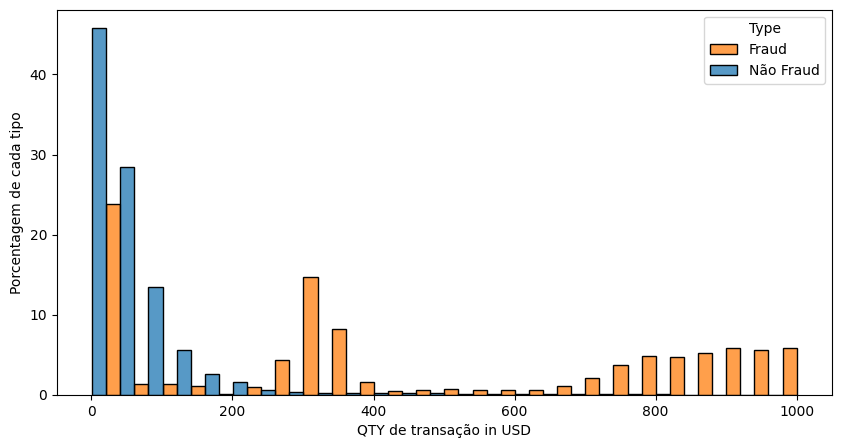

In [ ]:
#Relação entre Valor e Fraude
plt.figure(figsize=(10, 5))
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Porcentagem de cada tipo')
ax.set_xlabel('QTY de transação in USD')
plt.legend(title='Type', labels=['Fraud', 'Não Fraud'])

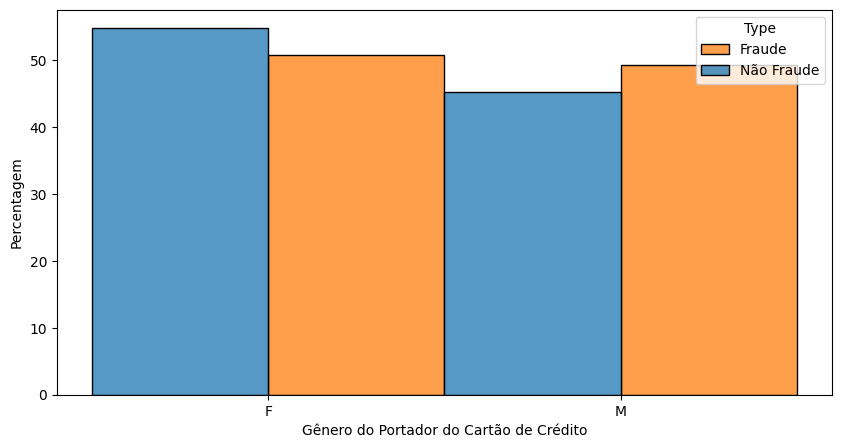

In [ ]:
#Relação entre Genero e Fraude
plt.figure(figsize=(10, 5))
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentagem')
ax.set_xlabel('Gênero do Portador do Cartão de Crédito')
plt.legend(title='Type', labels=['Fraude', 'Não Fraude'])

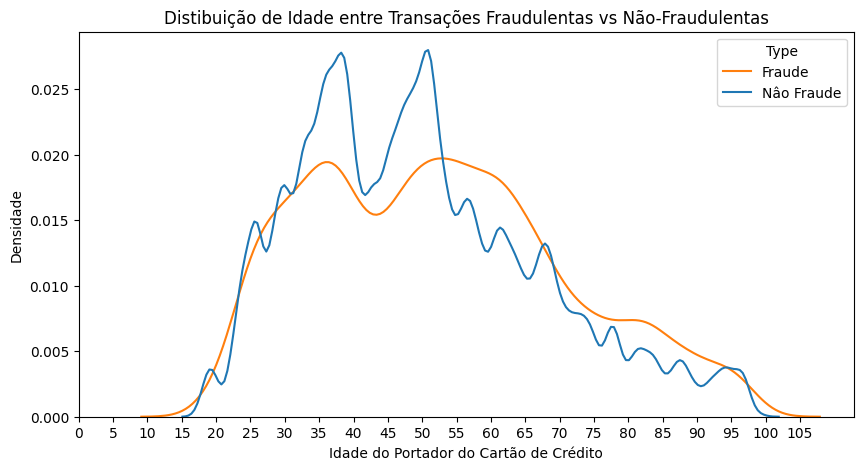

In [ ]:
#Relação entre Idade e Fraude

plt.figure(figsize=(10, 5))
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Idade do Portador do Cartão de Crédito')
ax.set_ylabel('Densidade')
plt.xticks(np.arange(0,110,5))
plt.title('Distibuição de Idade entre Transações Fraudulentas vs Não-Fraudulentas')
plt.legend(title='Type', labels=['Fraude', 'Nâo Fraude'])

<AxesSubplot: xlabel='hour', ylabel='count'>

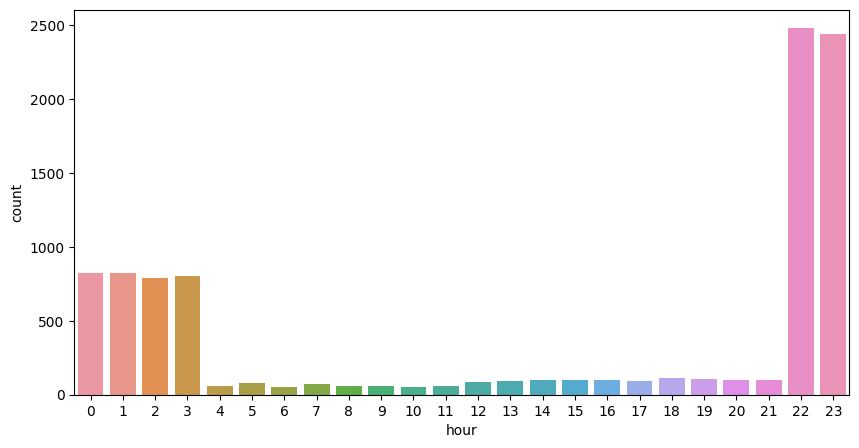

In [ ]:
#Plotando transações fraudulentas ao longo das horas do dia
plt.figure(figsize=(10, 5))
sns.countplot(x="hour",data=df[df["is_fraud"]==1])
#O Gráfico indica que a maioria das fraudes acontece entre as 22h e 03h do dia


<AxesSubplot: xlabel='month', ylabel='count'>

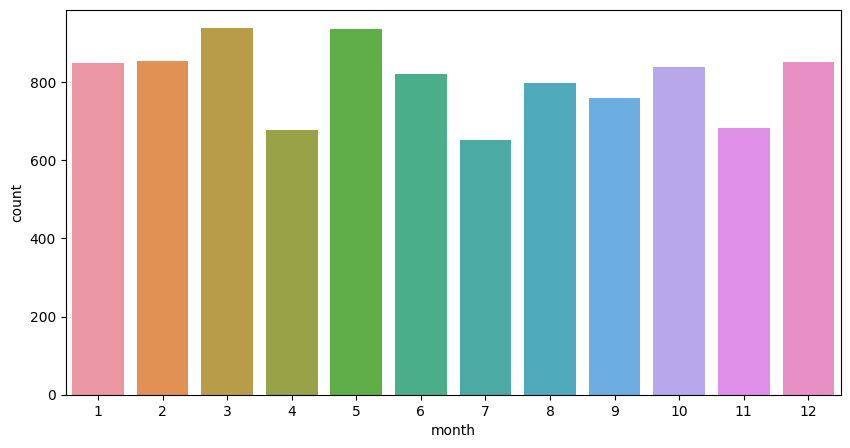

In [ ]:
#Plotando transações fraudulentas em cada mês
plt.figure(figsize=(10, 5))
sns.countplot(x="month",data=df[df["is_fraud"]==1])
#O grafico indica que mesmo com correlação significativa (Chi2) a variancia é baixa.

In [ ]:
df.drop(['year', 'day', 'dayofweek', 'month'],1,inplace=True)

C:\Users\marco\AppData\Local\Temp\ipykernel_8360\3979681127.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['year', 'day', 'dayofweek', 'month'],1,inplace=True)


<AxesSubplot: xlabel='state', ylabel='count'>

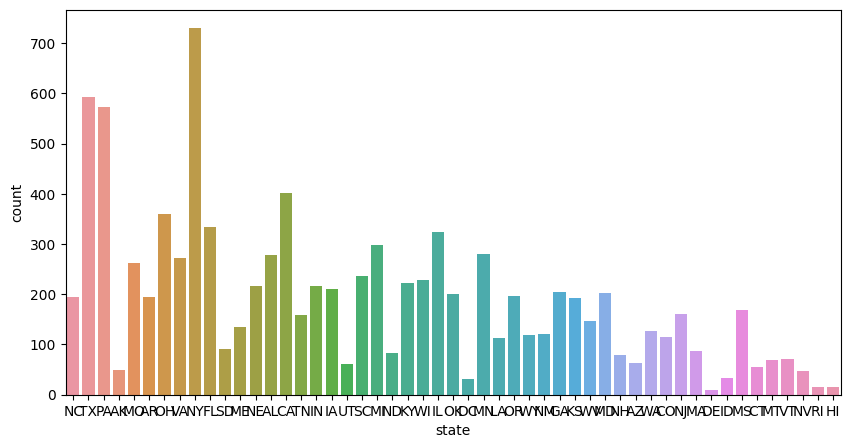

In [ ]:
#Plotting as transações fraudulentas por estado
plt.figure(figsize=(10, 5))
sns.countplot(x="state",data=df[df["is_fraud"]==1])
#O gráfico indica que existem estados que ocorrem mais fraudes com uma variância significativa

In [ ]:
#Creando DataFrame com o numero de fraudes de cada estado
df2 = df.groupby(by="state").sum()["is_fraud"].to_frame()
df2.reset_index(inplace=True)
df2 = df2.rename(columns = {"state":"State","is_fraud":"Fraudulent Transactions"})
df2.head()

C:\Users\marco\AppData\Local\Temp\ipykernel_8360\2674223301.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby(by="state").sum()["is_fraud"].to_frame()


,State,Fraudulent Transactions
0,AK,50
1,AL,278
2,AR,195
3,AZ,64
4,CA,402


In [ ]:
#Plotando mapa de calor de fraudes por estado
fig = px.choropleth(df2,
                    locations='State',
                    color='Fraudulent Transactions',
                    locationmode='USA-states',
                    color_continuous_scale="picnic",
                    labels={'States':'Fraudulent transactions'},
                    scope='usa')
fig.add_scattergeo(
    locations=df2['State'],
    locationmode='USA-states',
    text=df2['State'],
    mode='text'
)
fig.show()

#Essa vizualização ajuda a entender se existem regiões que tendem a ter mais fraudes

In [ ]:
#Subset contendo apenas as features que serão usadas no trainamento dos modelos
fraude = df[['category','amt','gender','age','state','is_fraud']]

In [ ]:
fraude.head()

,category,amt,gender,age,state,is_fraud
0,misc_net,4.97,F,35,NC,0
1,grocery_pos,107.23,F,45,WA,0
2,entertainment,220.11,M,61,ID,0
3,gas_transport,45.00,M,56,MT,0
4,misc_pos,41.96,M,37,VA,0


In [ ]:
#Convertendo categorias não-numéricas para variaveis dummy
fraude=pd.get_dummies(fraude, drop_first=True)
fraude.head()

,amt,age,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,4.97,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,45,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,220.11,61,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,56,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,37,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 3. Regressão Logística

### 3.1. Regressão Logística com estados

In [ ]:
fraude.columns

Index(['amt', 'age', 'is_fraud', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA',

In [ ]:

X = fraude.drop('is_fraud', axis=1)
y = fraude['is_fraud']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42, stratify=y)

In [ ]:
regressao_logistica = LogisticRegression(max_iter=20000)
regressao_logistica.fit(x_train, y_train)

LogisticRegression(max_iter=20000)

In [ ]:
y_pred = regressao_logistica.predict(x_test)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    460686
           1       0.00      0.00      0.00      2413

    accuracy                           0.99    463099
   macro avg       0.50      0.50      0.50    463099
weighted avg       0.99      0.99      0.99    463099



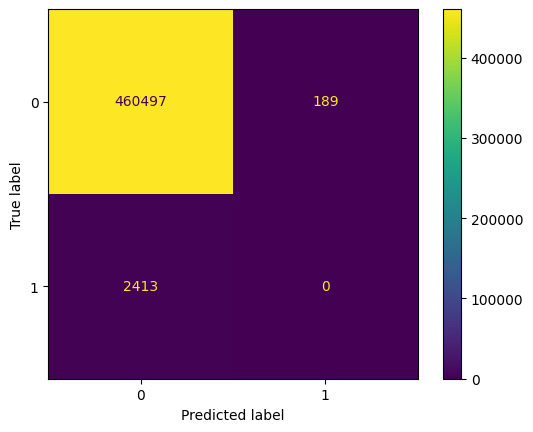

In [ ]:
# relatório de classificação
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### 3.2. Regressão Logística sem estados

In [ ]:
df_2 = df[['category','amt','gender','age','is_fraud']]
df_2.head()

,category,amt,gender,age,is_fraud
0,misc_net,4.97,F,35,0
1,grocery_pos,107.23,F,45,0
2,entertainment,220.11,M,61,0
3,gas_transport,45.00,M,56,0
4,misc_pos,41.96,M,37,0


In [ ]:
fraude2=pd.get_dummies(df_2, drop_first=True)
fraude2.head()

,amt,age,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,4.97,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,107.23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,220.11,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,45.00,56,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,41.96,37,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
X = fraude2.drop(['is_fraud'], axis=1)
y = fraude2['is_fraud']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42, stratify=y)

In [ ]:
regressao_logistica = LogisticRegression(max_iter=20000)
regressao_logistica.fit(x_train, y_train)

LogisticRegression(max_iter=20000)

In [ ]:
y_pred = regressao_logistica.predict(x_test)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    460686
           1       0.00      0.00      0.00      2413

    accuracy                           0.99    463099
   macro avg       0.50      0.50      0.50    463099
weighted avg       0.99      0.99      0.99    463099



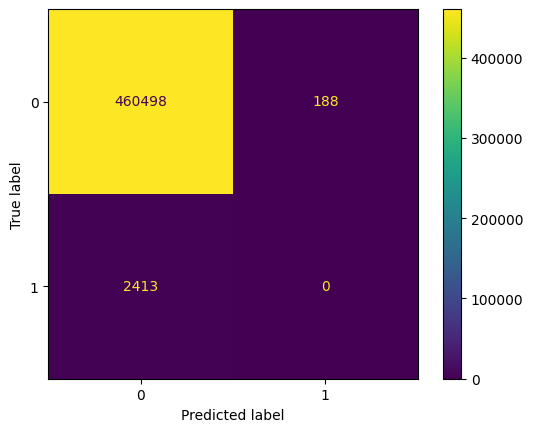

In [ ]:
# relatório de classificação
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### 3.3. Regressão Logística Aplicando Ferramentas

 * Pipeline
 * Standard Scale

In [ ]:
X = fraude2.drop(['is_fraud'], axis=1)
y = fraude2['is_fraud']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42, stratify=y)


In [ ]:
# Aplicando Pipeline e Scaler
lista_etapas = [("std_scaler", StandardScaler()), 
                ("RL", LogisticRegression(max_iter=20000))]

pipe = Pipeline(lista_etapas)

In [ ]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('RL', LogisticRegression(max_iter=20000))])

In [ ]:
y_pred = pipe.predict(x_test)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    460686
           1       0.00      0.00      0.00      2413

    accuracy                           0.99    463099
   macro avg       0.50      0.50      0.50    463099
weighted avg       0.99      0.99      0.99    463099



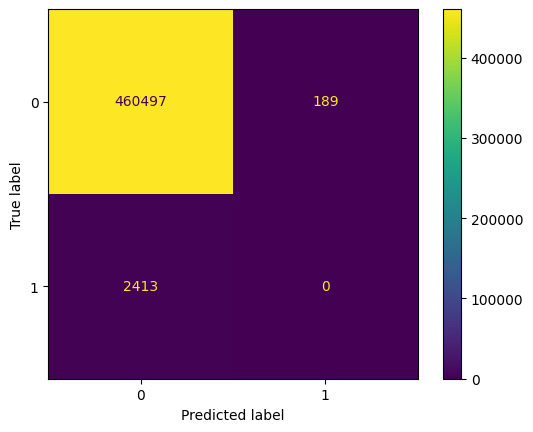

In [ ]:
# relatório de classificação
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## 4. KNN

### 4.1. Não Balanceado

In [ ]:
#X = fraude2.drop(['is_fraud'], axis=1)
#y = fraude2['is_fraud']
#x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42, stratify = y)

In [ ]:
# Aplicando Pipeline e Scaler
#lista_etapas = [("scaler", StandardScaler()), 
 #               ("model", KNeighborsClassifier())]

#pipe = Pipeline(lista_etapas)

In [ ]:
# construir o amostrador dos folds
#cvs = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

# criando a métrica "adaptada"
#score = make_scorer(recall_score, pos_label = 1)

# construir um dicionário de parâmetros
#param_dict = {
#    'model__metric': ['euclidian', 'manhattan', 'minkowski'],
 #   'model__n_jobs': [-1],
 #   'model__n_neighbors': range(3, 16, 2)
#}

# criar o objeto selecionador
#rs_cv = RandomizedSearchCV(pipe, param_dict, scoring = score, cv = cvs, n_iter=10, verbose = 10)
#rs_cv.fit(x_train, y_train)

In [ ]:
#pipe.fit(x_train, y_train)

### 4.2. Balanceado

#### 4.2.1. Over-sampling (NearMiss)

In [ ]:
X = fraude2.drop(['is_fraud'], axis=1)
y = fraude2['is_fraud']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42, stratify = y)

In [ ]:
from collections import Counter
# Apresentando diferença entre base antes e depois do balanceamento
print('Original dataset shape {}'.format(Counter(y_train)))
# Define o nivel de balancemento das classes
nm = NearMiss(sampling_strategy= 0.05)
X_res, y_res = nm.fit_resample(x_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 1382057, 1: 7238})
Resampled dataset shape Counter({0: 144760, 1: 7238})


In [ ]:
# Aplicando Pipeline e Scaler
#lista_etapas = [("scaler", StandardScaler()), 
#                ("model", KNeighborsClassifier(n_neighbors= 9, metric= 'manhattan', n_jobs = -1))]

knc = KNeighborsClassifier(n_neighbors= 5, metric= 'manhattan', n_jobs = -1)

In [ ]:
knc.fit(x_res, y_res)

KNeighborsClassifier(metric='manhattan', n_jobs=-1)

In [ ]:
y_pred = knc.predict(x_test)

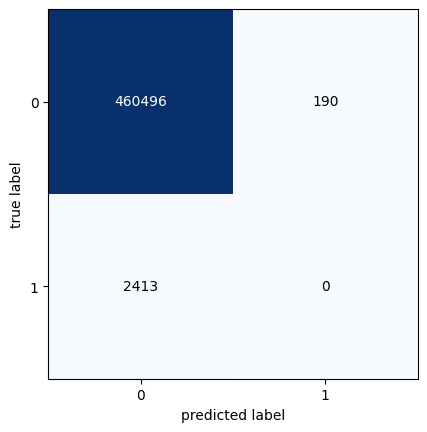

In [ ]:
# relatório de classificação
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### 4.2.2. Under-sampling (SMOTE)

## 5. Random Forest

### 5.1. Não Balanceado

In [ ]:
X = fraude2.drop(['is_fraud'], axis=1)
y = fraude2['is_fraud']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42, stratify = y)

In [ ]:
RF = RandomForestClassifier(random_state = 42)

cvs = KFold(n_splits=10, shuffle=True, random_state=42)

# criando a métrica "adaptada"
score = make_scorer(recall_score, pos_label = 1)

# construir um dicionário de parâmetros
param_dict = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15],
    'n_estimators': [5, 10, 20]
}

# criar o objeto selecionador
rs_cv = RandomizedSearchCV(RF, param_dict, scoring = score, cv = cvs, n_iter=10, verbose = 10)
rs_cv.fit(x_train, y_train)

In [ ]:
print('Melhores Parâmetros:')
print(rs_cv.best_params_)
print('Melhor Métrica Média:')
print(rs_cv.best_score_)

Melhores Parâmetros:
{'n_estimators': 10, 'max_depth': 15, 'criterion': 'log_loss'}
Melhor Métrica Média:
0.6582729845131906


In [ ]:
y_pred = rs_cv.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    460686
           1       0.79      0.66      0.72      2413

    accuracy                           1.00    463099
   macro avg       0.90      0.83      0.86    463099
weighted avg       1.00      1.00      1.00    463099



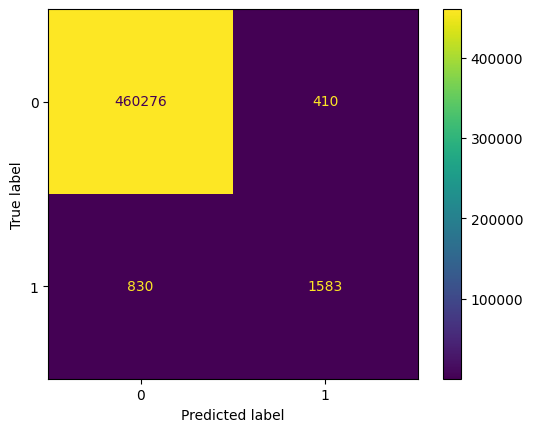

In [ ]:
# relatório de classificação
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### 5.2. Balanceado

#### 5.2.1. Under-sampling (NearMiss)

In [ ]:
X = fraude2.drop(['is_fraud'], axis=1)
y = fraude2['is_fraud']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42, stratify = y)

In [ ]:
# Apresentando diferença entre base antes e depois do balanceamento
print('Original dataset shape {}'.format(Counter(y_train)))
# Define o nivel de balancemento das classes
nm = NearMiss(sampling_strategy= 0.05)
X_res, y_res = nm.fit_resample(x_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 1382057, 1: 7238})
Resampled dataset shape Counter({0: 144760, 1: 7238})


In [ ]:
RF = RandomForestClassifier(random_state = 42)

cvs = KFold(n_splits=10, shuffle=True, random_state=42)

# criando a métrica "adaptada"
score = make_scorer(recall_score, pos_label = 1)

# construir um dicionário de parâmetros
param_dict = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10],
    'n_estimators': [5, 10]
}

# criar o objeto selecionador
rs_cv = RandomizedSearchCV(RF, param_dict, scoring = score, cv = cvs, n_iter=10, verbose = 10)
rs_cv.fit(X_res, y_res)

In [ ]:
print('Melhores Parâmetros:')
print(rs_cv.best_params_)
print('Melhor Métrica Média:')
print(rs_cv.best_score_)

Melhores Parâmetros:
{'n_estimators': 10, 'max_depth': 10, 'criterion': 'gini'}
Melhor Métrica Média:
0.8380485369738278


In [ ]:
y_pred = rs_cv.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    460686
           1       0.11      0.84      0.20      2413

    accuracy                           0.96    463099
   macro avg       0.56      0.90      0.59    463099
weighted avg       0.99      0.96      0.98    463099



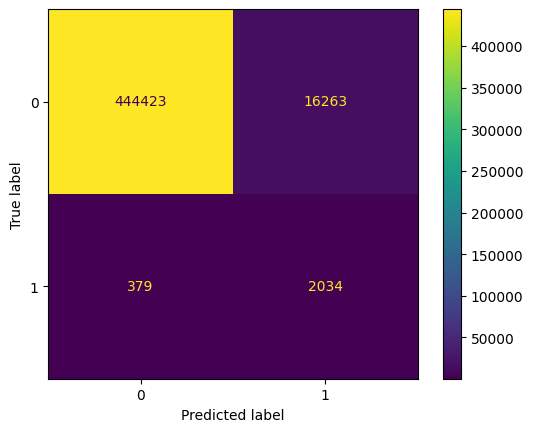

In [ ]:
# relatório de classificação
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### 5.2.2. Over-sampling (SMOTE)

In [ ]:
X = fraude2.drop(['is_fraud'], axis=1)
y = fraude2['is_fraud']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42, stratify = y)

In [ ]:
# Apresentando diferença entre base antes e depois do balanceamento
print('Original dataset shape {}'.format(Counter(y_train)))
# Define o nivel de balancemento das classes
sm = SMOTE(sampling_strategy= 0.05)
x_res, y_res = sm.fit_resample(x_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 1382057, 1: 7238})
Resampled dataset shape Counter({0: 1382057, 1: 69102})


In [ ]:
RF = RandomForestClassifier(random_state = 42)

cvs = KFold(n_splits=10, shuffle=True, random_state=42)

# criando a métrica "adaptada"
score = make_scorer(recall_score, pos_label = 1)

# construir um dicionário de parâmetros
param_dict = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10],
    'n_estimators': [5, 10]
}

# criar o objeto selecionador
rs_cv = RandomizedSearchCV(RF, param_dict, scoring = score, cv = cvs, n_iter=10, verbose = 10)
rs_cv.fit(x_res, y_res)

In [ ]:
print('Melhores Parâmetros:')
print(rs_cv.best_params_)
print('Melhor Métrica Média:')
print(rs_cv.best_score_)

Melhores Parâmetros:
{'n_estimators': 10, 'max_depth': 10, 'criterion': 'entropy'}
Melhor Métrica Média:
0.7697216686280026


In [ ]:
y_pred = rs_cv.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    460686
           1       0.71      0.73      0.72      2413

    accuracy                           1.00    463099
   macro avg       0.85      0.86      0.86    463099
weighted avg       1.00      1.00      1.00    463099



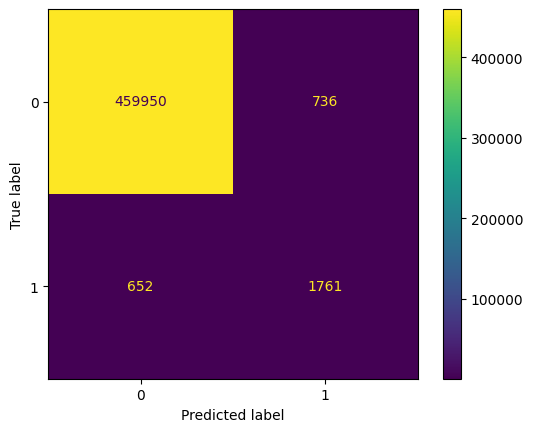

In [ ]:
# relatório de classificação
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

##### 5.2.2.1. Testando SMOTE com o KFold estratificado

In [ ]:
RF = RandomForestClassifier(random_state = 42)

cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# criando a métrica "adaptada"
score = make_scorer(recall_score, pos_label = 1)

# construir um dicionário de parâmetros
param_dict = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10],
    'n_estimators': [5, 10]
}

# criar o objeto selecionador
rs_cv = RandomizedSearchCV(RF, param_dict, scoring = score, cv = cvs, n_iter=10, verbose = 10)
rs_cv.fit(x_res, y_res)

In [ ]:
print('Melhores Parâmetros:')
print(rs_cv.best_params_)
print('Melhor Métrica Média:')
print(rs_cv.best_score_)

Melhores Parâmetros:
{'n_estimators': 10, 'max_depth': 10, 'criterion': 'log_loss'}
Melhor Métrica Média:
0.776851836069137


In [ ]:
y_pred = rs_cv.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    460686
           1       0.68      0.73      0.71      2413

    accuracy                           1.00    463099
   macro avg       0.84      0.87      0.85    463099
weighted avg       1.00      1.00      1.00    463099



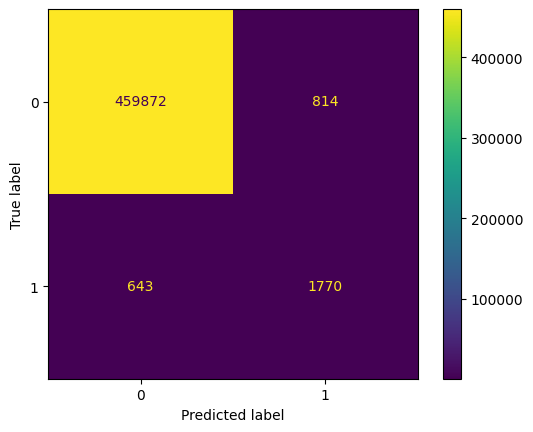

In [ ]:
# relatório de classificação
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## 6. Conclusão

In [ ]:
# Análise dos valores que foram fraudados
print(fraud_df.loc[fraud_df['is_fraud'] == 1]["amt"].describe())
#---------------
fraudes_totais = fraud_df.loc[fraud_df['is_fraud'] == 1]["amt"]
print(f"Valor perdido pelos bancos em fraudes: $ {fraudes_totais.mean()*fraudes_totais.shape[0]:.2f}")

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64
Valor perdido pelos bancos em fraudes: $ 5121413.29


  Foram desenvolvidos vários modelos de Machine Learning para detecção de fraudes bancárias e neste cenário bancário, o **recall** é principal métrica a ser analisada, pois os bancos desejam acertar todos os casos de fraude evitando assim indenizações aos clientes.

  Dentre os modelos temos o Random Forest desbalanceado, que obteve uma **precisão de 0,79** e **recall de 0,66**. Há também um modelo desenvolvido com a técnica de Under-sampling (Near miss), que obteve uma **precisão de 0,11** e **recall de 0,84**. Por fim, o modelo desenvolvido com Over-sampling obteve uma **precisão de 0,71** e **recall de 0,73.**

Cada modelo apresenta resultados diferentes e o gestor do banco deve analisá-los cuidadosamente antes de decidir qual modelo é mais adequado para suas necessidades. Se o banco deseja acertar o maior número possível de fraudes, mesmo que isso resulte em identificar transações legítimas como fraudulentas, então o modelo com maior recall (Near miss) pode ser a melhor escolha.

Por outro lado, se o banco deseja minimizar o número de falsos positivos e garantir que a maioria das transações identificadas como fraudulentas sejam realmente fraudulentas, então o modelo mais adequado seria o Over-sampling.

Independentemente do modelo escolhido, é importante ressaltar que nenhum modelo é 100% preciso. Portanto, a melhor abordagem pode ser utilizar o modelo como uma ferramenta para aplicar uma segunda camada de identificação em transações que forem julgadas como fraudulentas pelo modelo. Dessa forma, o banco pode garantir que a maioria das transações suspeitas seja identificada e avaliada antes de serem concluídas.



> Simulação com modelo Near Miss (recall 0,84)

Sabendo que o valor de perdas totais do banco é no valor de *5121413.29*, identificar e impedir 84% dessas transações seria equivalente a economizar 4301987,16.




## Referências

https://www.kaggle.com/datasets/kartik2112/fraud-detection

http://glemaitre.github.io/imbalanced-learn/generated/imblearn.under_sampling.NearMiss.html

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://imbalanced-learn.org/stable/user_guide.html#user-guide